# APS 8

#### Nome: Hugo Gonçalves Rocha 
#### Turma C

Entrega: 28/11 ao final do atendimento (17:15)

## Questão 1

Assuma que $X$ seja uma variável aleatória contínua que descreve o preço de um multímetro digital em uma loja brasileira qualquer. Ainda, assuma que o preço médio seja igual a $R\$ 45,00$ e o desvio padrão, igual a $R\$45,00$ e o desvio padrão, igual a $R\$ 25,00$.

Em todos os itens a seguir, deixe claro como foi construído o novo preço em função de $X$.

Deixe todas as contas claramente indicadas.

a) Se todas as lojas brasileiras que vendem multímetro resolvessem acrescentar 15 reais no preço de cada um dos seus respectivos multímetros. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

b) Se todas as lojas brasileiras que vendem multímetro resolvessem aumentar o preço de cada um dos seus respectivos multímetros em $150\%$. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

c) Se você precisa comprar dez multímetros e deseja comprá-los todos iguais e na mesma loja. Nesse caso, qual o gasto total esperado e respectivo desvio padrão?


### Item A

- E(x + d) = E(x) + d, com d constante. <br/>
- DP(x + d) = DP(x), com d constante.

E(X + d) = E(X) + d = 45 + 15 = 60,00 reais 

DP(X + d) = DP(X) = 25,00 reais

### Item B

- E(c∙x) = c∙E(x), com c constante.
- DP(c∙x) = c ∙ DP(X), com c constante.

E(c∙X) = c ∙ E(X) = 2.5 ∙ 45 = 112,50 reais <br/>
DP(c∙X) = c ∙ DP(X) = 2.5 ∙ 25 = 62,50 reais

### Item C

- E(c∙x) = c∙E(x), com c constante.
- DP(c∙x) = c ∙ DP(X), com c constante.

E(10∙X) = 10 ∙ E(X) = 10 ∙ 45 = 450 reais <br/>
DP(10∙X) = 10 ∙ DP(X) = 10 ∙ 25 = 250 reais

## Questão 2

	
	
Assuma que, na disciplina Ciência dos dados, a nota final da disciplina seja função da nota média das provas $X$ e da nota média dos projetos $Y$. Assuma ainda que ambas as notas tem mesmo peso na construção da nota final na disciplina.


Considerando que a nota média dos alunos nas provas segue uma normal com média 4 e desvio padrão igual a 1,5, ou seja $ X \sim N(4 ; 2,25)$ . E que a nota média dos alunos nos projetos segue uma normal com média 7 e desvio padrão igual a 1, ou seja, $Y\sim N(7 ; 1)$.


Na prática, é razoável acreditar que haja uma associação positiva entre essas notas. Aqui, considere que a covariância entre essas notas médias é igual a $0,675$ .

Em todos os itens a seguir, deixe todas as contas claramente indicadas. 


a) Calcule a nota média final e respectivo desvio padrão.
   
 b) Considere que a nota final na disciplina Ciência dos dados segue uma distribuição com média e variância obtidas no item anterior.      Calcule a probabilidade de um aluno ser aprovado na disciplina.


### Item A

In [21]:
import math
from scipy import stats

# Var(aX+bY) = a^2∙Var(X) + b^2∙Var(Y) + 2ab Cov(X,Y)

Efinal = (1/2)*(4+7)
DPfinal = math.sqrt(1.5**2+1+2*0.675)

print('A média final será', Efinal)
print('O desvio padrão final será', DPfinal)

A média final será 5.5
O desvio padrão final será 2.1447610589527217


In [5]:
aprovacao = 1-stats.norm.cdf(5,loc=Efinal, scale = DPfinal)
print('Como a média é 5.0, o aluno tem', round(aprovacao*100, 2),'% de chance de ser aprovado.')

Como a média é 5.0, o aluno tem 59.22 % de chance de ser aprovado.


### Dataset para as questões de programação

Vamos trabalhar com o problema *House Sales in King County*, do Kaggle
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

In [12]:
houses = pd.read_csv("casas.csv")

In [13]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,grade
0,540000.0,4,2.50,2600,9935,2.0,0,8
1,815000.0,3,3.75,2780,5002,2.0,0,10
2,279000.0,3,2.25,2070,7800,1.0,900,7
3,360000.0,2,2.50,1233,1244,2.0,270,7
4,309000.0,3,2.50,1990,3614,2.0,0,7


## Q3

O dataset fornecido é uma amostra extraída de um dataset maior. A amostra pode ter vindo de uma população com média de `sqft_lot` de 8250? 

Passos:

**a)** Verifique que `sqft_lot` **não** é normal.

Dica: na *APS 7* foi feito um teste de normalidade. Repita o mesmo processo

**b)**  Se `sqft_lot` fosse normal, que tipo de teste poderíamos ter usado?

**c)** Saberíamos $\mu$ para montar o t? Saberíamos $\sigma$?


**Bootstrap**:

**d)** Monte um intervalo percentil boostrap de $95\%$.

**e)** Informe os valores inferiores e superiores

**f)** Conclua o teste


### A

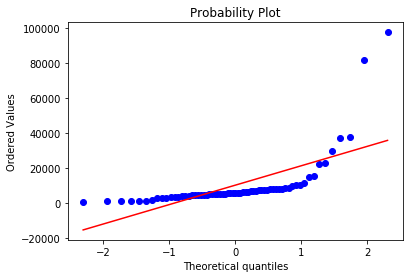

In [10]:
stats.probplot(houses.sqft_lot, dist='norm', plot=plt)
plt.show()

Como visto acima, a varíavel houses.sqft_lot não possui uma distribuição normal.

### B

Caso a variável possuisse uma distribuição normal, poderia-se utilizar o teste t.

### C

Não saberíamos $\mu$ e nem $\sigma$. Em vez disso, utilizariamos um grau de liberdade.

### D E F

In [19]:
dados = pd.Series(houses.sqft_living)
n = len(dados)


xbarra = np.mean(dados)
dp = np.std(dados,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral:", dp)

xbarra_Boot = []
dp_Boot = []
B = 10000
for i in range(B):
    amostra = np.random.choice(dados, size=n, replace=True)
    xbarraB = np.mean(amostra)
    xbarra_Boot.append(xbarraB)
    dpB = np.std(amostra,ddof=1)
    dp_Boot.append(dpB)

print('\nLimites da média:')  
lim_inf = np.percentile(xbarra_Boot, 2.5)
lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', lim_inf)
print('Limite superior:', lim_sup)

print('\nLimites do DP:')
lim_inf = np.percentile(dp_Boot, 2.5)
lim_sup = np.percentile(dp_Boot, 97.5)
print('Limite inferior:', lim_inf)
print('Limite superior:', lim_sup)


print('\nComo a média e o DP estão dentro dos limites calculados, provavelmente a amostra está dentro do grau de confiança estabelecido, de 95%')

Média:  2094.2153846153847
Desvio padrão amostral: 853.1023072496145

Limites da média:
Limite inferior: 1893.39923077
Limite superior: 2300.03269231

Limites do DP:
Limite inferior: 711.42828202
Limite superior: 972.702484888

Como a média e o DP estão dentro dos limites calculados, provavelmente a amostra está dentro do grau de confiança estabelecido, de 95%


## Q4

Faça uma regressão que usa `sqft_living` como variável explicativa  e `price` como resultado: 



In [20]:
import numpy as np
import statsmodels.api as sm

X = houses.sqft_living
Y = houses.price
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     56.21
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           2.70e-10
Time:                        13:57:10   Log-Likelihood:                -892.24
No. Observations:                  65   AIC:                             1788.
Df Residuals:                      63   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.928e+04   7.44e+04      0.662      0.510   -9.95e+04    1.98e+05
sqft_living   247.0810     32.954      7.498      0.000     181.227     312.935
==============================================================================
Omnibus:                       12.716   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.432
Skew:                           0.973   Prob(JB):                      0.00121
Kurtosis:                       4.081   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**a).** De acordo com a notação que usamos em aula, quem é $\hat{\beta_0}$ e quem é $\hat{\beta_1}$ ?

##### Resposta

O $\hat{\beta_1}$ é o coeficiente angular e o $\hat{\beta_0}$ é o coeficiente linear da reta que define a função. O coeficiente angular mede as variações da variável resposta Y ao se variar a variável prevista X. Já o coeficiente linear indica qual valor para Y quando X é 0.


**b).** Interprete o $R^2$ , os valores $P > |t|$ e também *Prob (F-statistic)*.

##### Resposta

O $R^2$, também chamado de coeficiente de determinação, basicamente mede a percentagem com a qual a variável dependente pode ser prevista pela regressão. No caso, mede a porcentagem de influência de sqrt_living em price.

O valor $P > |t|$  calcula a probabilidade de não se rejeitar a hipótese nula, uma vez que o valor-p for maior que o valor crítico. Neste caso se consideraria rejeitar a hipótese nula com este valor sendo 0.

O Já *Prob (F-statistic)* checa se os coeficientes da regressão são todos 0, tratando que nessa regressão a probabilidade disso ocorrer é um valor muito pequeno. Assim todos valores levam a conclusão de não se rejeitar a hipótese nula.

**c).** Escreva a equação que expressa `price` em função de `sqft_living`.

#### Resposta:

Y = 49280 + 247.0810X


**d).** Faça um gráfico de dispersão de `price` em função de `sqft_living`, plote a equação que encontrou no item anterior no mesmo gráfico


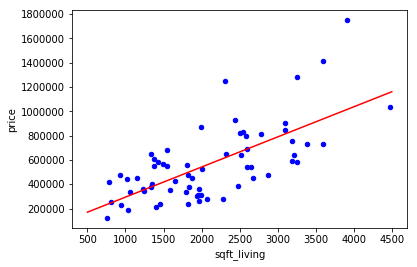

In [24]:
houses.plot.scatter('sqft_living','price',c='b')
plt.plot((500,4500),(170000,1161144),c='r')

## Q5

Faça agora uma regressão múltipla que tenta prever `price` (variável explicada) em função das variáveis `sqft_lot`  e `sqft_basement` (explicativa).

Dica: inclua as duas colunas dentro de uma variável `X`, o restante não se altera em relação à regressão simples.


```python
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
```

Pede-se:

**a).** Repita a intepretação dos valores $P > |t|$ e Prob (F-statistic) porém com duas variáveis.

O que os valores encontrados implicam para a regressão?


**b).** Escreva a função que foi encontrada pela regressão ( `price` em função de  `sqft_lot`  e `sqft_basement`)

##### A

In [26]:
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]

import numpy as np
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9115
Date:                Tue, 28 Nov 2017   Prob (F-statistic):              0.407
Time:                        14:53:41   Log-Likelihood:                -912.03
No. Observations:                  65   AIC:                             1830.
Df Residuals:                      62   BIC:                             1837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.237e+05   5.01e+04     10.462      0.000    4.24e+05    6.24e+05
sqft_lot          2.7668      2.383      1.161      0.250      -1.997       7.531
sqft_basement    68.6891    101.802      0.675      0.502    -134.810     272.188
==============================================================================
Omnibus:                       24.116   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.221
Skew:                           1.369   Prob(JB):                     5.02e-09
Kurtosis:                       5.572   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Neste caso, o valor de $R^2$ é pequeno, o que indica uma baixa relação entre as variações das duas variáveis sqft_lot e sqft_basement e a variável resposta price. Pelo valor de $P > |t|$, sqft_lot leva à rejeição da hipótese nula, enquanto sqft_basement não sugere nenhuma decisão. O valor de *Prob (F-statistic)*, a chance de os coeficientes serem 0 é de 40,7% . Portanto, segundo os dados, a escolha correta é a não rejeição da hipótese nula.

#### B

Y = 523700 + 2.7668X1 + 68.6891X2